<a href="https://www.kaggle.com/code/devprashantpathak/salifort-motors-predict-employee-retention?scriptVersionId=149829649" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![Happy Employees](https://drive.google.com/uc?export=view&id=1TMoABLSCqhjvS4Sa2_G4Lkvh7y0LIxrb)
# Employee Retention Analysis for HR Department

## Understanding the business scenario and problem
The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They have the following question: what’s likely to make the employee leave the company?

Goal: To analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## HR Dataset
The dataset contains 15,000 rows and 10 columns for the variables listed below.

Variable|Description
---|---
satisfaction_level|Employee-reported job satisfaction level [0-1]
last_evaluation|Score of employee's last performance review [0-1]
number_project|Number of projects employee contributes to
average_monthly_hours|Average number of hours employee worked per month
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Imports

In [1]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Build model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# Metrics and other functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# To display all columns in dataframes
pd.set_option('display.max_columns', None)

# Saving model
import pickle

In [2]:
# Load dataset into dataframe
df0 = pd.read_csv("/kaggle/input/salifort-motors/HR_dataset.csv")

# Display first few rows
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Exploratory Data Analysis
- Understand variables and analyze relationships between variables
- Clean dataset (missing data, redundant data, outliers)

### Gathering basic information about the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gathering descriptive statistics about the data

In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Data Cleaning
### Rename the columns as needed
- Ensure column names are in snake_case
- correct column names that are misspelled
- make column names more concise as needed

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {'average_montly_hours': 'average_monthly_hours', 'time_spend_company': 'tenure', 'Work_accident': 'work_accident', 'Department': 'department'})

# Display all column names after update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
### Check missing values

In [8]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check for duplicates

In [9]:
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe into a new variable
df1 = df0.drop_duplicates(keep='first')

# Display first 5 rows
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Checking Outliers

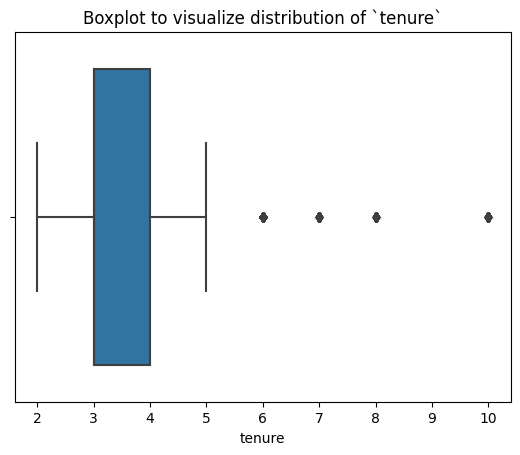

In [12]:
# Boxplot to visualize distribution of 'tenure' and detect any outliers
sns.boxplot(x=df1['tenure'])
plt.title('Boxplot to visualize distribution of `tenure`')
plt.show()

In [13]:
# Determine the number of rows containing outliers
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

# Calculate Inter quartile range
iqr = percentile75 - percentile25

# Calculate Limits
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

outliers = df0[(df0['tenure'] > upper_limit) | (df0['tenure'] < lower_limit)]

print(f"Total Outliers: {len(outliers)}")

Total Outliers: 1282


> Certain types of models are more sensitive to outliers than others. 
When we get to the stage of building the model, we'll consider whether to remove outliers, based on the type of model we decide to use.

Lets understand how many employees left and what percentage of all employees this figure represents.

In [14]:
# Number of employees who left vs stayed
print(df1['left'].value_counts())

# Percentage of employees who left vs who stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


## Data Visualizations
Create plots to visualize relationships between variables in the data

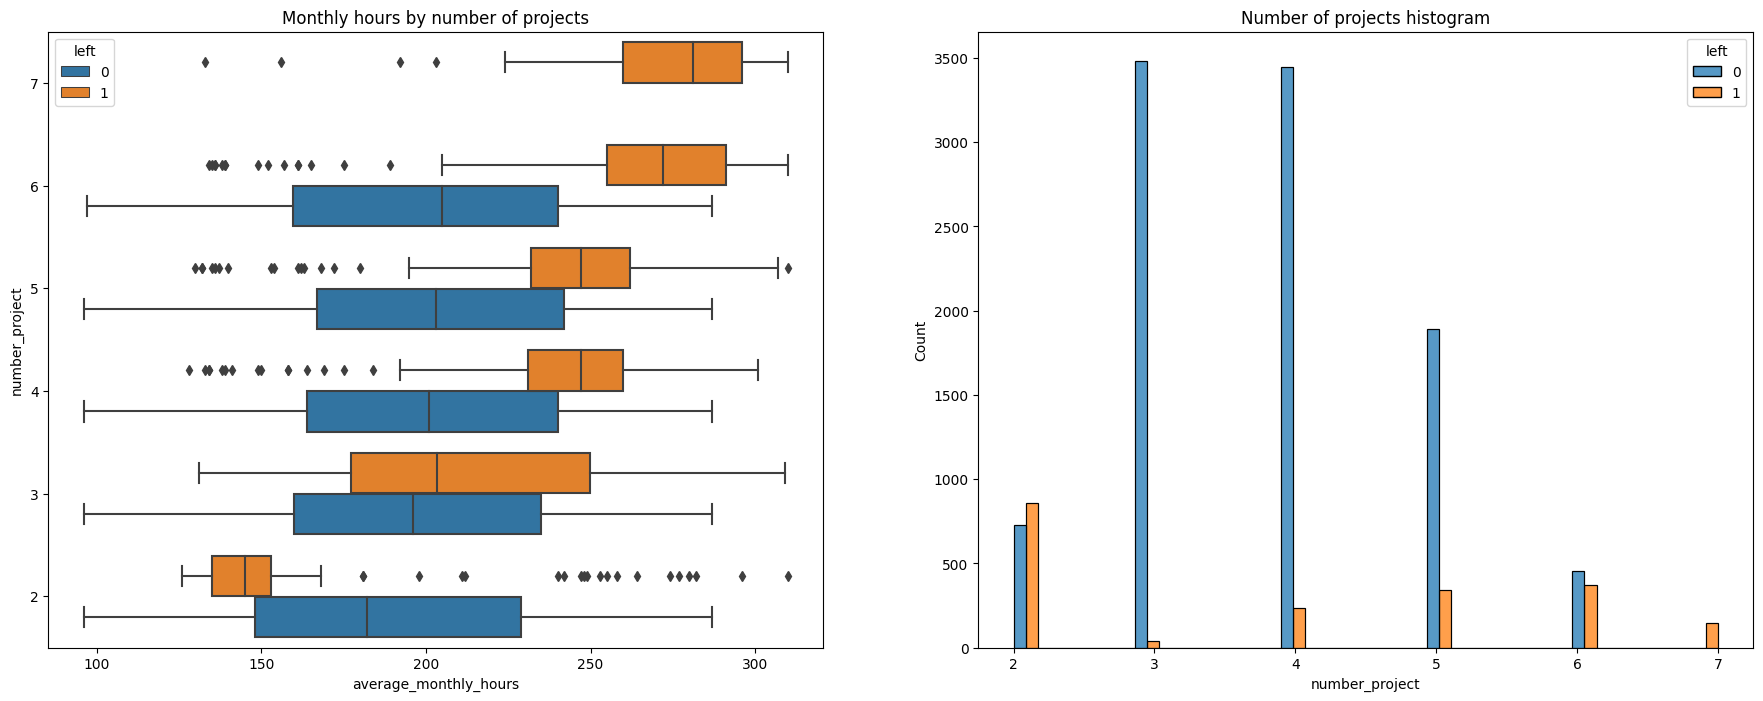

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# Boxplot showing 'average_monthly_hours' distribution for 'number_project', comparing employees who left vs who stayed
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects')

# Histogram for 'number_project', comparing employees who left vs who stayed
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', ax=ax[1])
ax[1].set_title('Number of projects histogram')

plt.show()

It might be natural that people who work on more projects would also work longer hours. 

This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

There are two groups of employees who left the company: 
  * (A) those who worked considerably less than their peers with the same number of projects, and
  * (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

* Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/week—much more than any other group.

* The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

* If we assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

In [16]:
# Count of employees with 7 projects who left and who stayed
df1[df1['number_project'] == 7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

Result: This confirms that all employees with 7 projects did leave

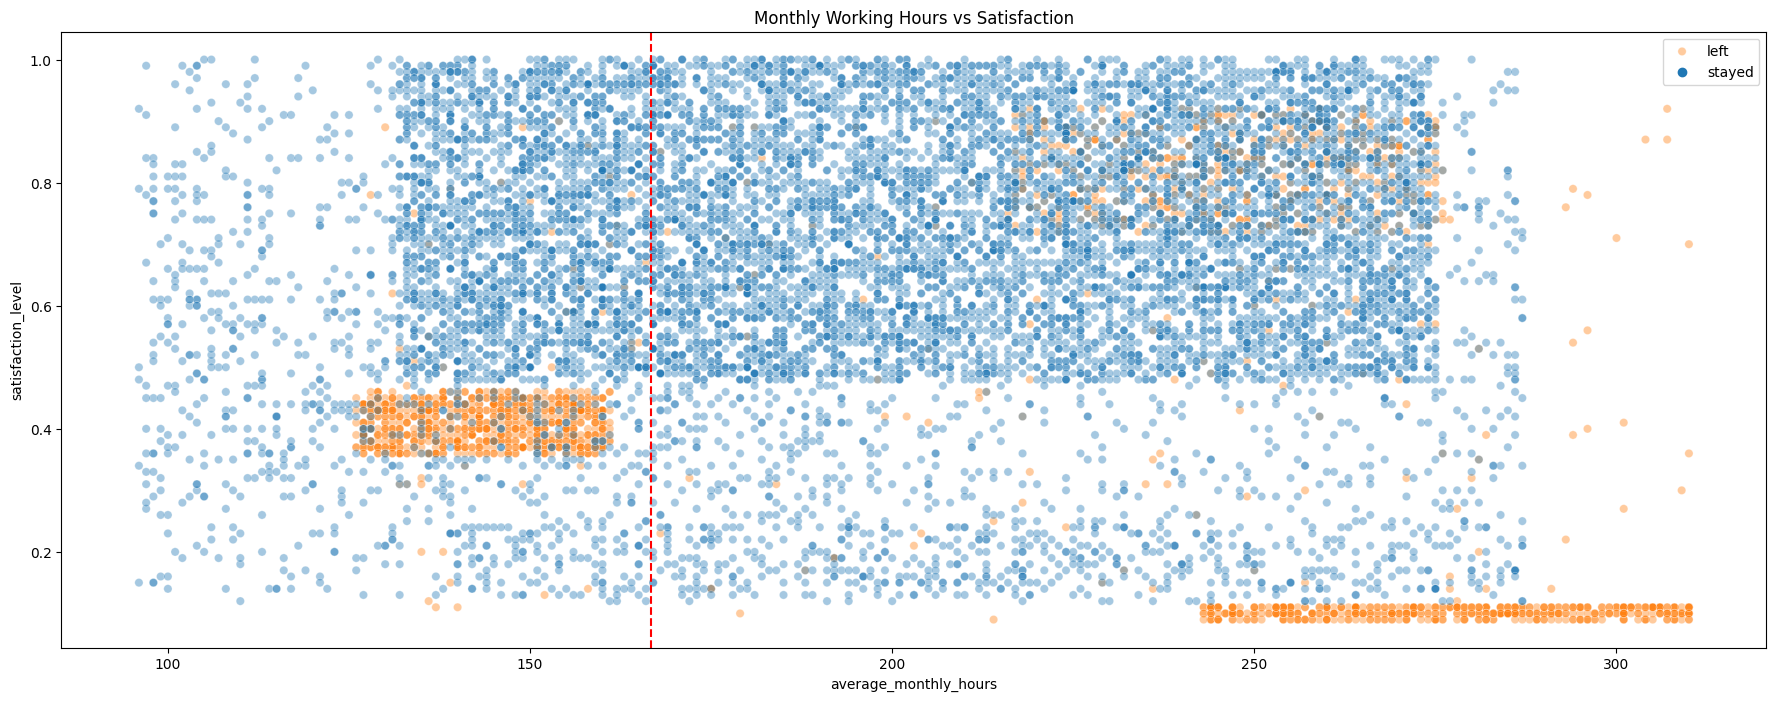

In [17]:
# Satisfaction Level according to Average Monthly Hours
plt.figure(figsize=(22,8))
sns.scatterplot(x=df1['average_monthly_hours'], y=df1['satisfaction_level'], hue=df1['left'], alpha=0.4)
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly Working Hours vs Satisfaction')
plt.show()

* The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

* The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

* Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

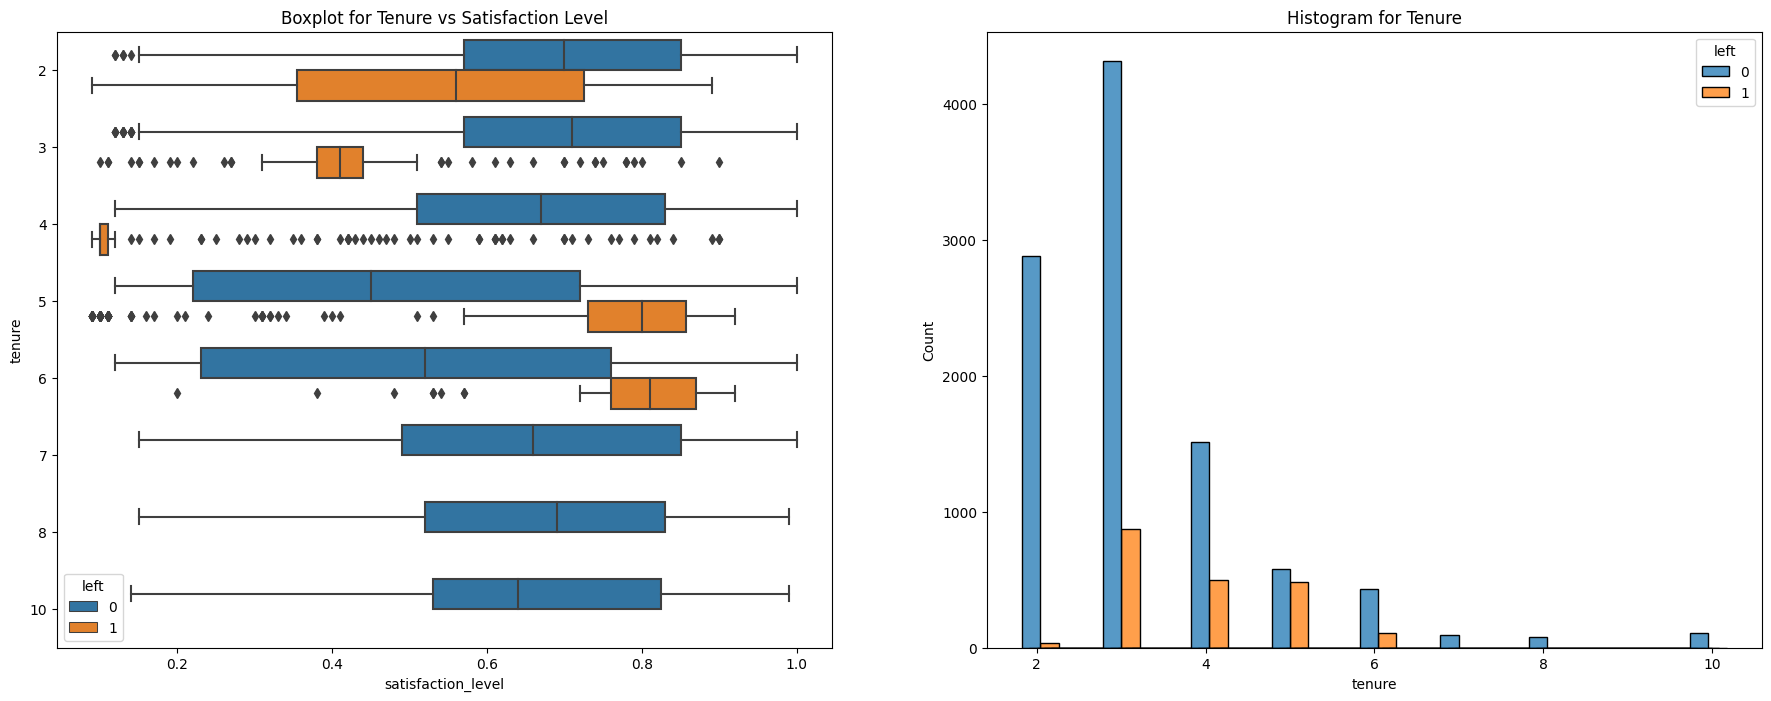

In [18]:
# Satisfaction Level for Tenure
fig, ax = plt.subplots(1, 2, figsize=(22, 8))
sns.boxplot(x=df1['satisfaction_level'], y=df1['tenure'], hue=df1['left'], orient='h', ax=ax[0])
ax[0].set_title('Boxplot for Tenure vs Satisfaction Level')

# Histogram showing distribution of Tenure and Comparing employees who left vs who stayed
tenure_stay = df1[df1['left'] == 0]['tenure']
tenure_left = df1[df1['left'] == 1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Histogram for Tenure')

plt.show()

Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.

Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.

The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.

The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

In [19]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

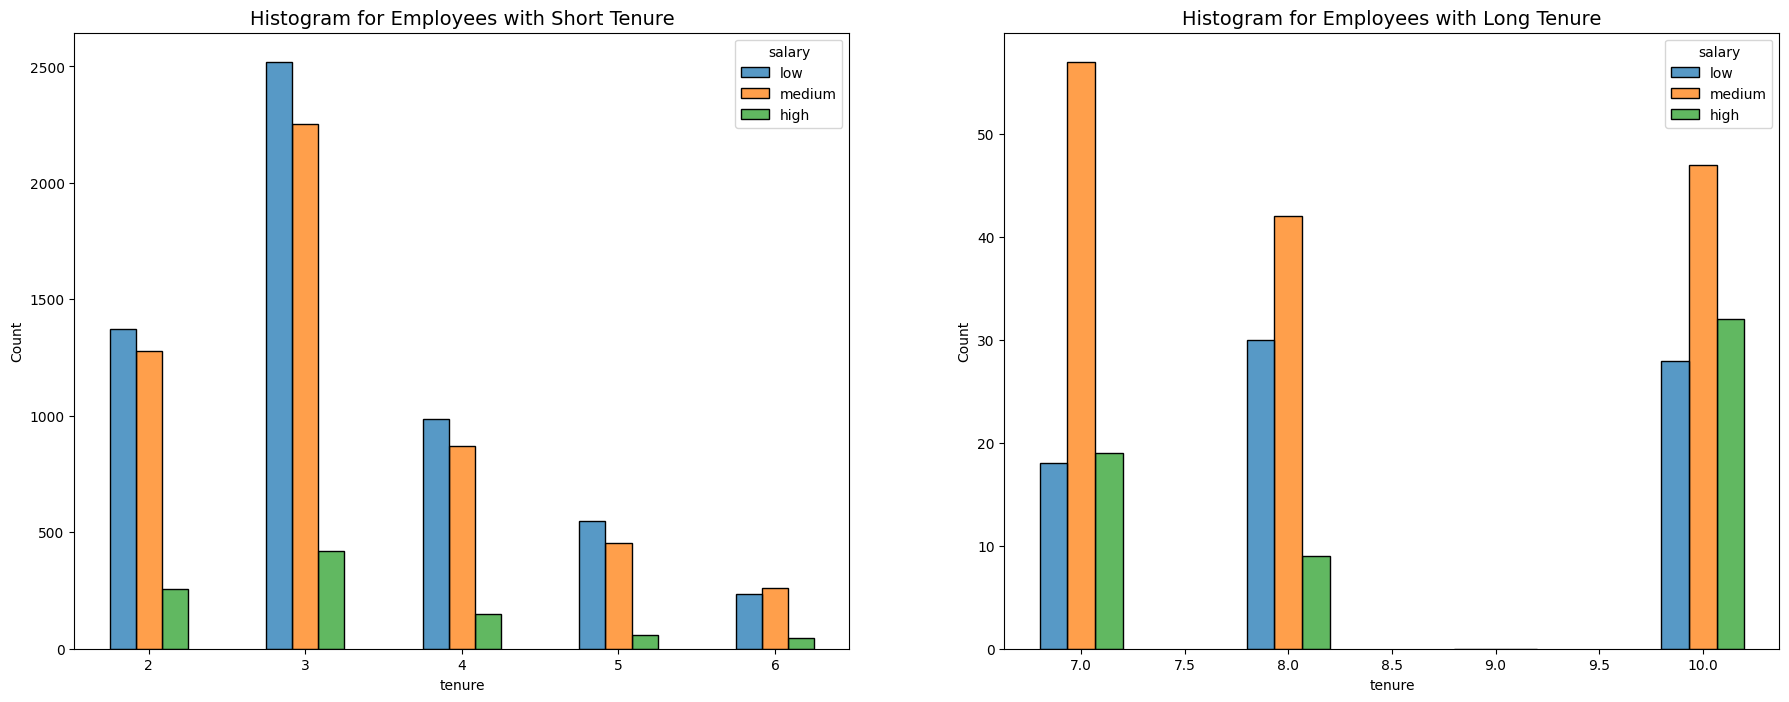

In [20]:
# Histogram for Salary Levels for different Tenures
fig, ax = plt.subplots(1, 2, figsize=(22, 8))
short_tenure = df1[df1['tenure'] < 7]
long_tenure = df1[df1['tenure'] > 6]

sns.histplot(data=short_tenure, x='tenure', hue='salary', multiple='dodge', hue_order=['low', 'medium', 'high'], shrink=0.5, discrete=1, ax=ax[0])
ax[0].set_title('Histogram for Employees with Short Tenure', fontsize=14)

sns.histplot(data=long_tenure, x='tenure', hue='salary', multiple='dodge', hue_order=['low', 'medium', 'high'], shrink=0.4, discrete=1, ax=ax[1])
ax[1].set_title('Histogram for Employees with Long Tenure', fontsize=14)

plt.show()

Observation: The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

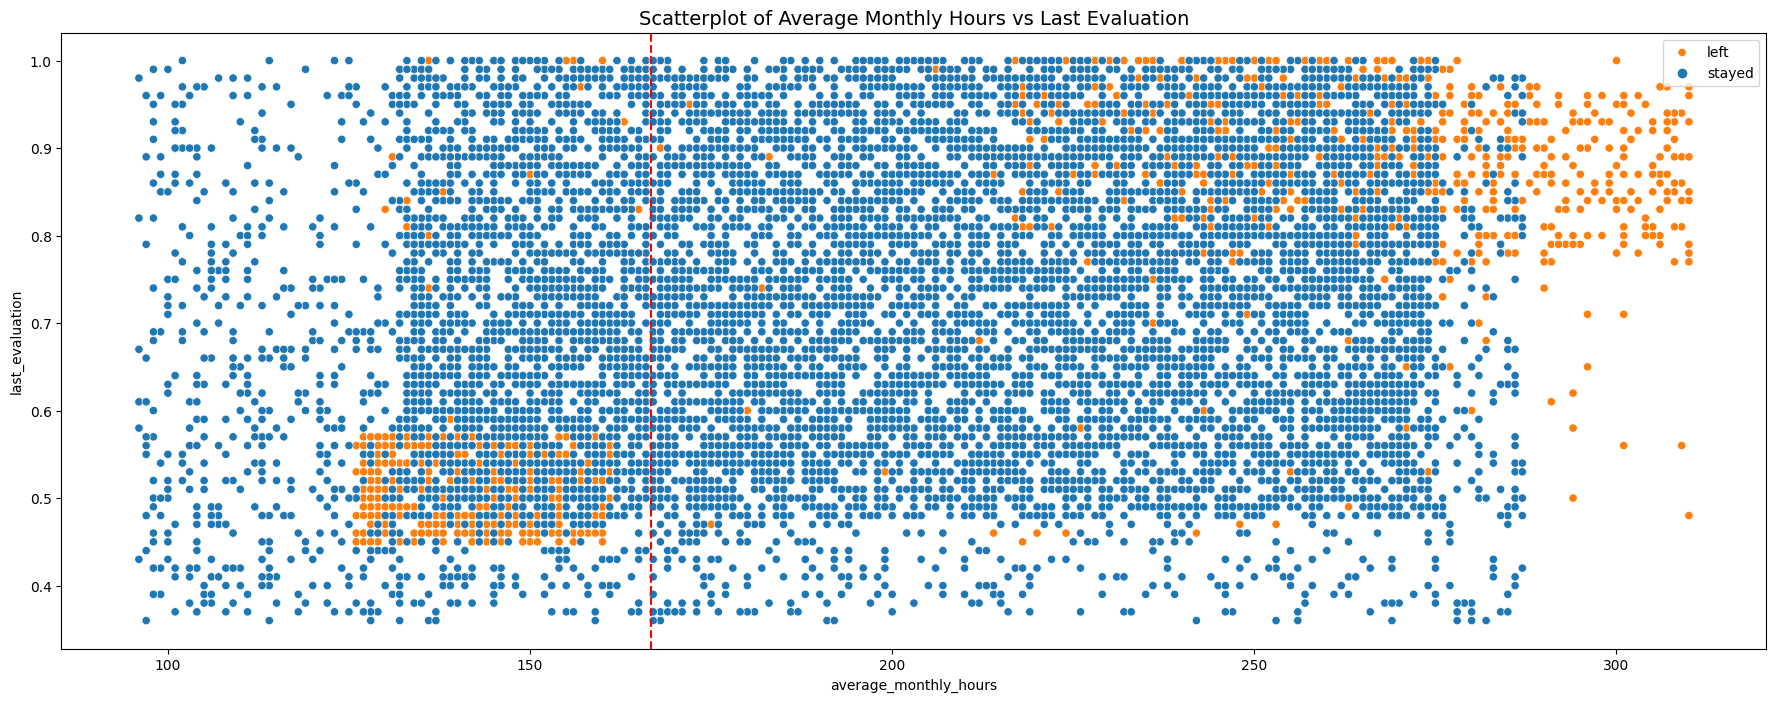

In [21]:
# Scatterplot of Average Monthly Hours vs Last Evaluation
plt.figure(figsize=(22, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left')
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title('Scatterplot of Average Monthly Hours vs Last Evaluation', fontsize=14)

plt.show()

The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.

There seems to be a correlation between hours worked and evaluation score.

There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.

Most of the employees in this company work well over 167 hours per month.

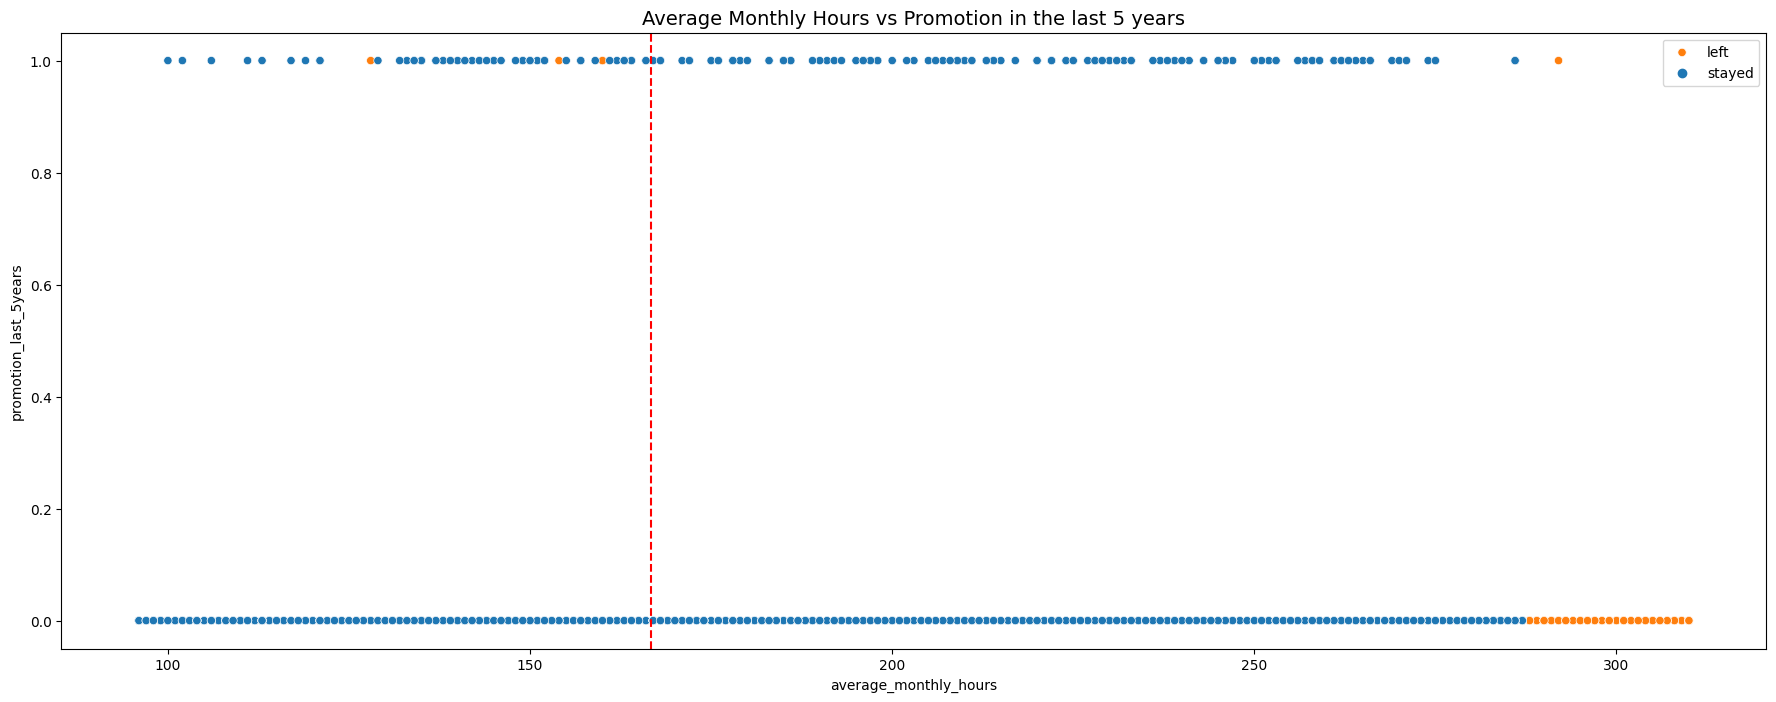

In [22]:
# Scatterplot to examine relationship between Average Monthly Hours and Promotions in the last 5 years

plt.figure(figsize=(22, 8))
sns.scatterplot(data= df1, x= 'average_monthly_hours', y= 'promotion_last_5years', hue= 'left')
plt.title('Average Monthly Hours vs Promotion in the last 5 years', fontsize= 14)
plt.axvline(x= 166.67, color= 'red', ls= '--')
plt.legend(labels= ['left', 'stayed'])
plt.show()

Observations:
Very few employees who were promoted in the last five years left
Very few employees who worked the most hours were promoted
All of the employees who left were working the longest hours

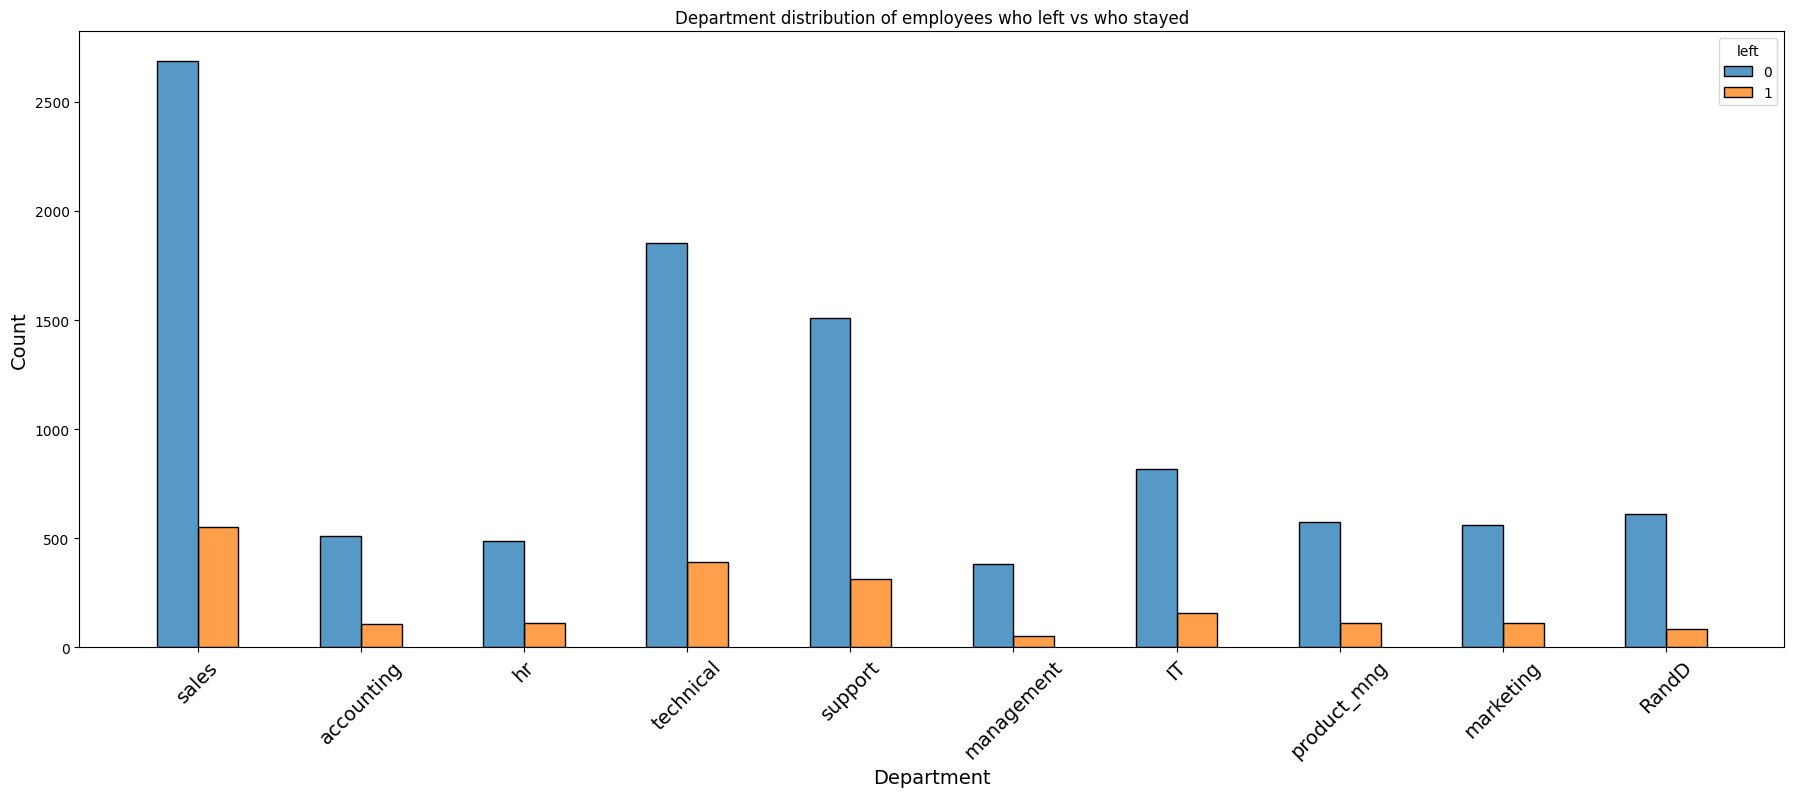

In [23]:
# Histogram to compare department distribution of employees who left vs who stayed

plt.figure(figsize= (22, 8))
sns.histplot(data= df1, x= 'department', hue= 'left', multiple= 'dodge', discrete= 1, shrink= 0.5, hue_order= [0, 1])
plt.title('Department distribution of employees who left vs who stayed')
plt.xlabel('Department', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(rotation= 45, fontsize= 14)
plt.show()

Observations:
There doesn't seem to be any department that differs significantly in its proportion of employees who left vs who stayed

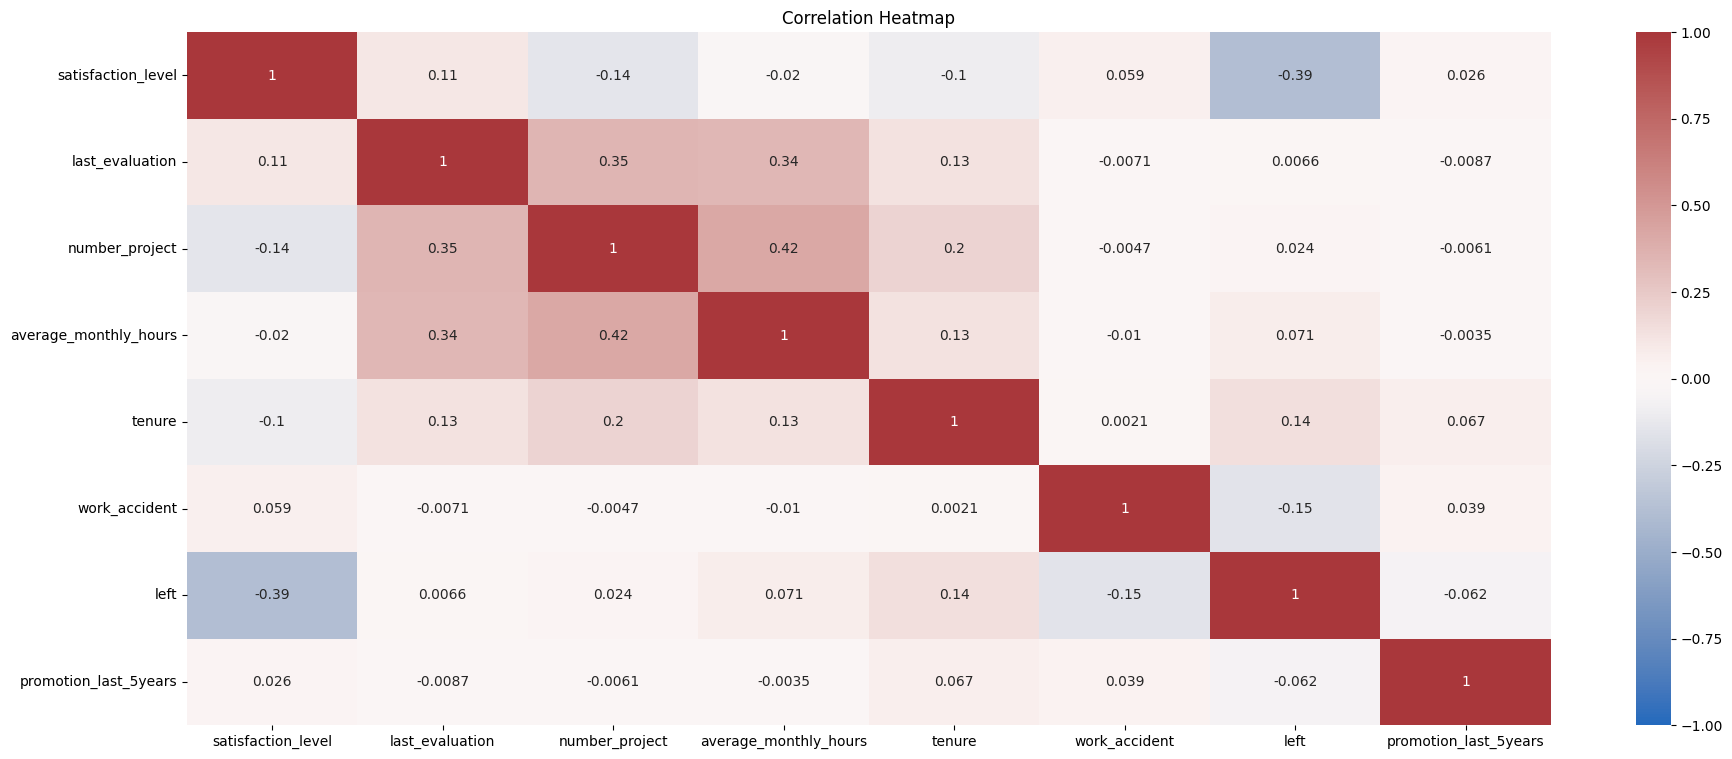

In [24]:
# Checking correlations between variables in the data

df2 = df0.drop(['salary', 'department'], axis= 1)
plt.figure(figsize=(22,9))
sns.heatmap(data=df2.corr(), vmin= -1, vmax= 1, annot= True, cmap= sns.color_palette('vlag', as_cmap= True))
plt.title('Correlation Heatmap')
plt.show()

Observation:
The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have same positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level

## Insights
It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# Model Building

- Determine which models are most appropriate
- Construct model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data